# __Implementing a Decision Tree from Scratch__

In [7]:
import numpy as np

In [8]:
class TreeNode:
    def __init__(self,feature=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.left    = left
        self.right   = right 
        self.value   = value

        

In [9]:
class DecisionTreeClassifierScratch:
    def __init__(self,max_depth=None):
        self.max_depth = max_depth
        self.root = None


    def fit(self,X,y):
        self._grow_tree(X,y)

    def predict(self,X):
        return np.array([self._traverse_tree(x,self.root) for x in X])

    def _grow_tree(self,X,y,depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping Criteria
        if depth >= self.max_depth or n_labels == 1:
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        # find the best split 
        best_feature, best_threshold = self._best_split(X, y, n_samples, n_features)

        # Grow the children recursively
        left_indices  = X[:, best_feature] <= best_threshold
        right_indices = X[:,best_feature] > best_threshold

        left_subtree  = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return TreeNode(best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self,X,y,n_samples, n_features):
        best_gain = -1 
        split_idx, split_threshold = None, None

        for feature_idx in range(n_features):
            X_column  = X[:,feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                gain = self._information_gain(X_column, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold
        return split_idx, split_threshold   


    def _information_gain(self, X_column, y, threshold):
        parent_entropy = self._entropy(y)

        # Generate split
        left_indices = X_column <= threshold
        right_indices = X_column > threshold

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 0
        
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        e_left, e_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right
        ig = parent_entropy - child_entropy
        return ig

    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x[node.left])
        return self._traverse_tree(x[node.right])
                           

In [2]:
from sklearn.datasets import load_iris

data = load_iris()


In [4]:
import pandas as pd 

df_features = pd.DataFrame(data.data, columns=data.feature_names)

df_target = pd.DataFrame(data.target, columns=['target'])

df_combined = pd.concat([df_features, df_target],axis=1)


In [5]:
df_combined.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


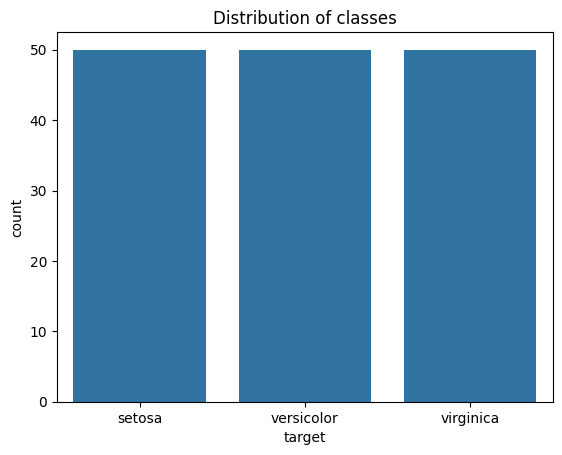

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x='target',data=df_combined)
plt.title('Distribution of classes')
plt.xticks([0,1,2],data.target_names)
plt.show()

In [13]:
from PyPDF2 import PdfReader
import re
def clean_text(text):
    # Remove unwanted special characters
    cleaned_text = re.sub(r"[^a-zA-Z0-9 \-_\\.@()]", "", text)
    # Remove newline characters
    cleaned_text = re.sub(r"\n", " ", cleaned_text)
    return cleaned_text


def extract_text_from_pdf(path):
    pdf_reader = PdfReader(path)
    text = ""
    for i, _ in enumerate(pdf_reader.pages):
        page = pdf_reader.pages[i]
        text += page.extract_text()
    clean = clean_text(text)
    return clean

path = "../../../../Downloads/altacv-template.pdf"


print(extract_text_from_pdf(path))


YOUR NAME HEREYour Position or Tagline Here@your_name@email.com phone000-00-0000 envelpeddrs Street 00000 Cuntry ap-arkerLocation COUNTRYglbewww.homepage.com xicon@x-handle linkedinyour_id githubyour_id orcid0000-0000-0000-0000EXPERIENCEJob Title 1Company 15Month 20XX  Ongoing ap-arkerLocationJob description 1Job description 2Job Title 2Company 25Month 20XX  Ongoing ap-arkerLocationJob description 1Job description 2PROJECTSProject 1Funding agencyinstitutionDetailsProject 2Funding agencyinstitution5Project durationA short abstract would also work.A DAY OF MY LIFESleepbeautiful sleepHopeful nov-elist by nightDaytime jobSports and relaxationSpending timewith familyMY LIFE PHILOSOPHYSomething smart or heartfelt prefer-ably in one sentence.MOST PROUD OF6Fantastic Achievementand some details about itheartbeatAnother achievementmore details about it of courseheartbeatAnother achievementmore details about it of courseSTRENGTHSHard-working Eye for detailMotivator  LeaderC Embedded SystemsStatis